In [1]:
import os
import torch
import matplotlib.pyplot as plt
from glob import glob
from src import build_model
from train import set_args

In [2]:
args = set_args()
args.device = "cuda"

ddpm = build_model(args)
paths = glob(os.path.join(args.save_dir, "*.pth"))
ddpm.load_state_dict(
    torch.load(paths[-1], map_location=args.device)
)
ddpm.eval()
print("All keys matched successfully")

All keys matched successfully


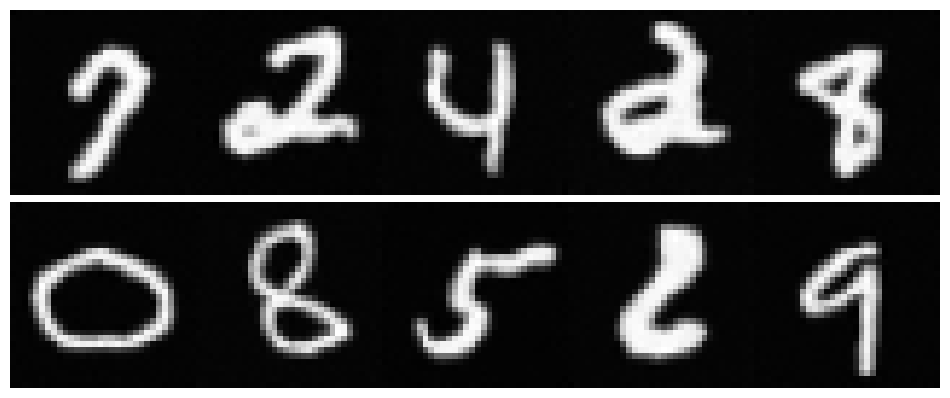

In [3]:
imgs = ddpm.sample(image_size=args.image_size, batch_size=10)

plt.figure(figsize=(12, 5))
for i, img in enumerate(imgs[-1]):
    plt.subplot(2, 5, i+1)
    plt.imshow(img[0], cmap="gray")
    plt.axis("off")
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()